In [1]:
import neuron
from neuron import h,rxd,gui2
print(neuron.__version__)


from neuron import h,rxd, gui
from neuron.units import ms, mV
import textwrap

7.7.2


#Step 2: Create a cell 

##Aside 1: NEURON's h.topology function
NEURON's h.topology() function displays the topological structure of the entire model, indicating which sections are connected to which sections, where they are connected, and how many segments each section is divided into.


load library

In [2]:
import numpy as np
import matplotlib.pyplot as plt
image = np.load('data_from_19513019.npy')

(50000, 2)


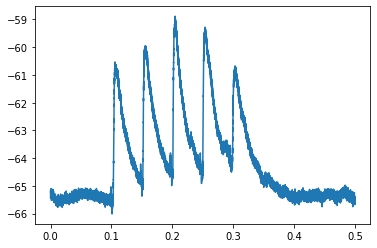

In [3]:
print(image.shape)
x = image[:,0]
y = image[:,1]
plt.plot(x,y)
plt.show()

In [4]:
soma = h.Section(name='soma')
soma.L = 20
soma.diam = 20
soma.insert('hh')
dendrite = h.Section(name='dendrite')
dendrite.L = 500
dendrite.diam = 0.5
dendrite.nseg = 10
dendrite.insert('pas')
dendrite_1 = h.Section(name='dendrite_1')
dendrite_1.L = 100
dendrite_1.diam = 0.5
dendrite_1.nseg = 10
dendrite_1.insert('pas')
dendrite_2 = h.Section(name='dendrite_2')
dendrite_2.L = 100
dendrite_2.diam = 0.5
dendrite_2.nseg = 10
dendrite_2.insert('pas');

Connection

In [5]:
dendrite.connect(soma,1,0)
dendrite_1.connect(dendrite,1,1)
dendrite_2.connect(dendrite,1,1);

In [6]:
h.topology()


|-|       soma(0-1)
   `---------|       dendrite(0-1)
              `---------|       dendrite_1(1-0)
              `---------|       dendrite_2(1-0)



1.0

Insert an alpha synaspe

Alpha synaspe 

In [50]:
asyn = h.AlphaSynapse(soma(0.5))
asyn.onset = 10
asyn.gmax = 20
h.psection()
h.topology()

soma { nseg=1  L=20  Ra=35.4
	/*location 0 attached to cell 0*/
	/* First segment only */
	insert morphology { diam=20}
	insert capacitance { cm=1}
	insert hh { gnabar_hh=0.12 gkbar_hh=0.036 gl_hh=0.0003 el_hh=-54.3}
	insert na_ion { ena=50}
	insert k_ion { ek=-77}
	insert AlphaSynapse { onset=10 tau=0.1 gmax=20 e=0}
}

|-|       soma(0-1)
   `---------|       dendrite(0-1)
              `---------|       dendrite_1(1-0)
              `---------|       dendrite_2(1-0)



1.0

In [57]:
h.load_file('stdrun.hoc')

s = h.NetStim(400)
s.interval =50
s.number=5
s.noise=0
s.start=100
h.tstop = 500
h.finitialize(-70 * mV)
h.run(500)

0.0

In [58]:
v = h.Vector().record(soma(0.5)._ref_v)             # Membrane potential vector
t = h.Vector().record(h._ref_t)     

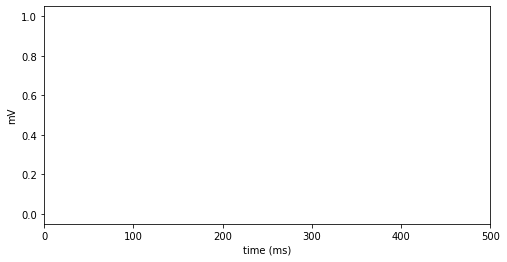

In [59]:
plt.figure(figsize=(8,4)) # Default figsize is (8,6)
plt.plot(t, v)
plt.xlabel('time (ms)')
plt.xlim(0,500)
plt.ylabel('mV')
plt.show()

In [ ]:
x1 = image[1000:,0]
y1 = image[1000:,1]

In [ ]:
v = h.Vector([0, 0])
def efun(v):
  return (v[0] + v[1] ) ** 2 + (v[0] - v[1]) ** 2  
h.attr_praxis(1e-5, 0.5, 0)
e = h.fit_praxis(efun, v)
print("e=%g x=%g y=%g\n"%(e, v[0], v[1]))


In [ ]:
s = h.NetStim(.5)

In [60]:
s.interval =50
s.number=10
s.noise=0
s.start=20